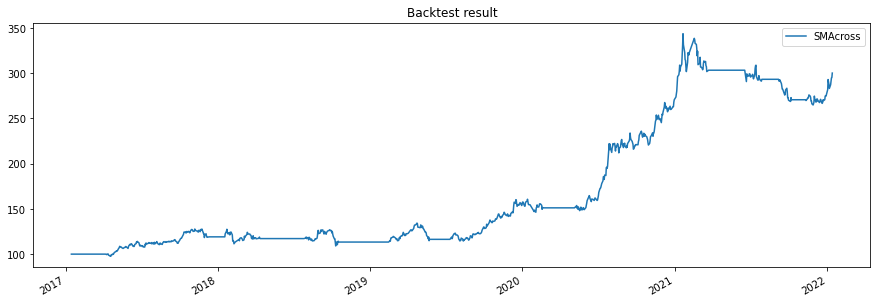

Stat                 SMAcross
-------------------  ----------
Start                2017-01-15
End                  2022-01-14
Risk-free rate       0.00%

Total Return         200.19%
Daily Sharpe         1.31
Daily Sortino        2.23
CAGR                 24.61%
Max Drawdown         -22.93%
Calmar Ratio         1.07

MTD                  9.27%
3m                   10.89%
6m                   -2.66%
YTD                  9.27%
1Y                   -0.71%
3Y (ann.)            38.34%
5Y (ann.)            24.61%
10Y (ann.)           -
Since Incep. (ann.)  24.61%

Daily Sharpe         1.31
Daily Sortino        2.23
Daily Mean (ann.)    24.50%
Daily Vol (ann.)     18.75%
Daily Skew           0.41
Daily Kurt           6.85
Best Day             9.97%
Worst Day            -6.76%

Monthly Sharpe       1.10
Monthly Sortino      3.16
Monthly Mean (ann.)  24.35%
Monthly Vol (ann.)   22.09%
Monthly Skew         2.57
Monthly Kurt         12.96
Best Month           35.94%
Worst Month          -10.04%



In [1]:
import bt
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf

#直接顯示圖片
%matplotlib inline

# 載入2330台積電過去五年每日收盤價資料
data = pd.read_csv(r'C:\Users\npc94\OneDrive\桌面\2330.TW.csv',index_col=0,parse_dates=True)

#轉換資料類型
data_c = data['Close'].to_frame().dropna()

# 計算兩條不同時間的均線，分別以20天和50天均線做計算
sma = data_c.rolling(20).mean()
sma2 = data_c.rolling(50).mean()

# 定義交易策略，短天期均線超越長天期均線即作多
bt_strategy = bt.Strategy('SMAcross', 
                          [bt.algos.SelectWhere(sma > sma2),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
#開始進行回測
bt_backtest = bt.Backtest(bt_strategy, data_c)
bt_result = bt.run(bt_backtest)

#繪製回測完的資金報酬變動
bt_result.plot(title='Backtest result')
plt.show()

#顯示回測參數
bt_result.display()